In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("E:\\Backup F4 26.04.2023\\Downloads\\kidney_disease - kidney_disease.csv")

In [3]:
display(df)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
display(df.head())

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.info()
df.describe()
df.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.shape

(400, 26)

In [7]:
df['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [8]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [10]:

# Load dataset
#df = pd.read_csv("kidney_disease - kidney_disease.csv")

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill numerical NaN values with median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill categorical NaN values with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# (Optional) Check if all NaNs are removed
print(df.isna().sum())


id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


In [11]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [12]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [13]:
df.shape

(400, 26)

In [14]:
df.drop('id', axis = 1, inplace= True)

In [15]:
df.index = range(0,len(df),1)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    object 
 16  wc              400 non-null    object 
 17  rc              400 non-null    obj

In [18]:

# Replace "?" with NaN
df[['pcv','wc','rc']] = df[['pcv','wc','rc']].replace("?", pd.NA)

# Convert to numeric
df['pcv'] = pd.to_numeric(df['pcv'])
df['wc'] = pd.to_numeric(df['wc'])
df['rc'] = pd.to_numeric(df['rc'])

# Fill missing values
df['pcv'] = df['pcv'].fillna(df['pcv'].median())
df['wc'] = df['wc'].fillna(df['wc'].median())
df['rc'] = df['rc'].fillna(df['rc'].median())

# Convert to required types
df['pcv'] = df['pcv'].astype(int)
df['wc'] = df['wc'].astype(int)
df['rc'] = df['rc'].astype(float)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    int64  
 16  wc              400 non-null    int64  
 17  rc              400 non-null    flo

In [19]:
obj_dt = df.select_dtypes(include = 'object')
obj_dt.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in obj_dt.columns:
  df[i] = le.fit_transform(df[i])

In [21]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44,7800,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38,6000,5.2,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31,7500,5.2,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32,6700,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35,7300,4.6,0,0,0,0,0,0,0


In [22]:
df.replace({'classification':{'ckd\t':'ckd',0:1,1:0}},inplace=True)

In [23]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44,7800,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38,6000,5.2,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31,7500,5.2,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32,6700,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35,7300,4.6,0,0,0,0,0,0,1


<Axes: >

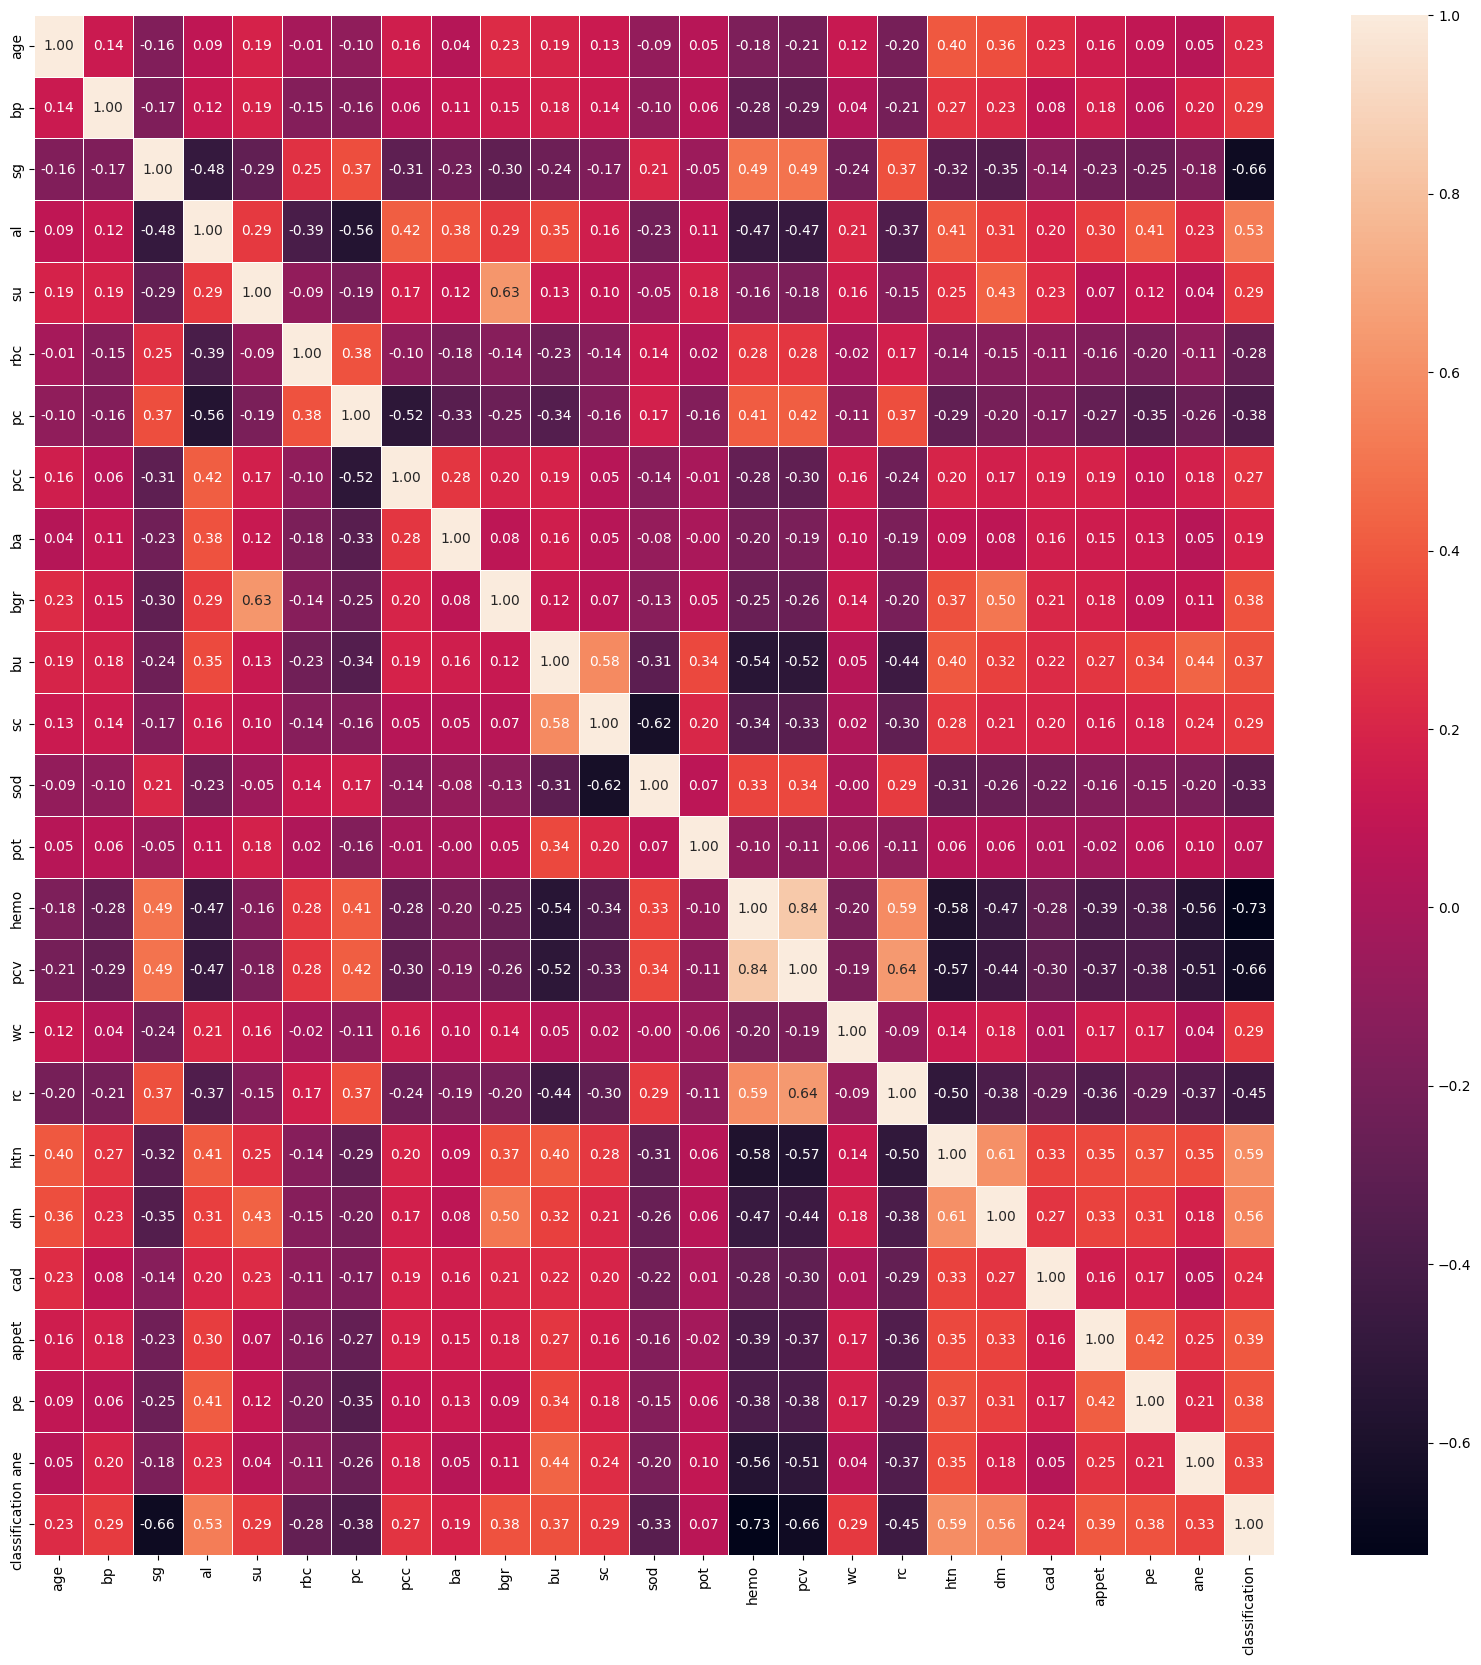

In [24]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, fmt=".2f",linewidths=0.5)

In [25]:
df.corr()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
age,1.000000,0.136316,-0.160374,0.085918,0.186750,-0.014904,-0.102286,0.157401,0.042427,0.230731,...,-0.210819,0.118358,-0.202985,0.395073,0.364306,0.231419,0.156581,0.094772,0.052938,0.227842
bp,0.136316,1.000000,-0.166980,0.123518,0.189561,-0.150384,-0.156231,0.056808,0.110164,0.150180,...,-0.285876,0.041212,-0.208429,0.266901,0.226489,0.084135,0.175054,0.056902,0.195134,0.293693
sg,-0.160374,-0.166980,1.000000,-0.479962,-0.292053,0.253894,0.365353,-0.306426,-0.231704,-0.299413,...,0.491157,-0.238927,0.371683,-0.323643,-0.351016,-0.135814,-0.230975,-0.253803,-0.184155,-0.659504
al,0.085918,0.123518,-0.479962,1.000000,0.287751,-0.394844,-0.561713,0.417868,0.377935,0.293150,...,-0.470819,0.214292,-0.368210,0.406057,0.308101,0.200957,0.303145,0.411080,0.229556,0.531562
su,0.186750,0.189561,-0.292053,0.287751,1.000000,-0.092940,-0.190062,0.168091,0.119399,0.627002,...,-0.180658,0.161298,-0.149470,0.254268,0.430514,0.229301,0.069216,0.116442,0.042464,0.294555
rbc,-0.014904,-0.150384,0.253894,-0.394844,-0.092940,1.000000,0.377394,-0.102948,-0.184402,-0.138615,...,0.278263,-0.021247,0.166161,-0.140538,-0.145646,-0.111493,-0.160868,-0.199285,-0.107625,-0.282642
pc,-0.102286,-0.156231,0.365353,-0.561713,-0.190062,0.377394,1.000000,-0.520118,-0.330401,-0.247665,...,0.417339,-0.107953,0.365479,-0.291719,-0.201032,-0.172295,-0.274985,-0.350227,-0.260566,-0.375154
pcc,0.157401,0.056808,-0.306426,0.417868,0.168091,-0.102948,-0.520118,1.000000,0.275082,0.195223,...,-0.297980,0.158375,-0.238772,0.195623,0.165236,0.188029,0.189688,0.104356,0.175861,0.265313
ba,0.042427,0.110164,-0.231704,0.377935,0.119399,-0.184402,-0.330401,0.275082,1.000000,0.079162,...,-0.188624,0.095807,-0.186593,0.089046,0.080070,0.162395,0.149126,0.134732,0.052208,0.186871
bgr,0.230731,0.150180,-0.299413,0.293150,0.627002,-0.138615,-0.247665,0.195223,0.079162,1.000000,...,-0.255274,0.137788,-0.195546,0.367816,0.503254,0.207020,0.177285,0.094806,0.112449,0.379321


1️⃣ Distribution of Age (Histogram)

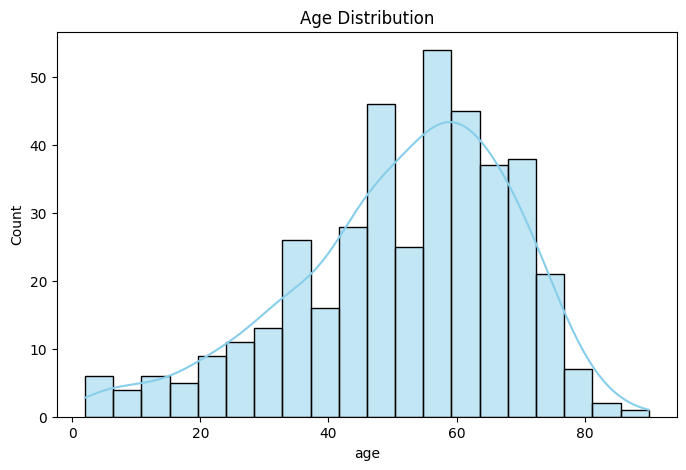

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()

2️⃣ Blood Pressure vs. Age (Scatter Plot)

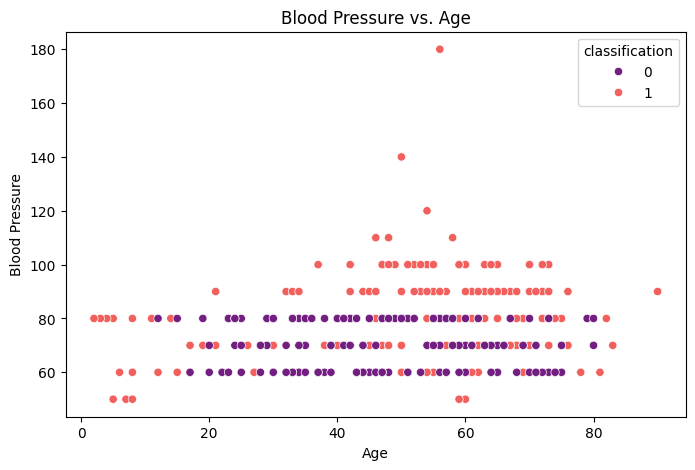

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['age'], y=df['bp'], hue=df['classification'], palette='magma')
plt.title('Blood Pressure vs. Age')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()


3️⃣️Protein Level vs. Classification (Box Plot)

C:\Users\Deepi\AppData\Local\Temp\ipykernel_13036\3580302749.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['classification'], y=df['al'], palette='viridis')


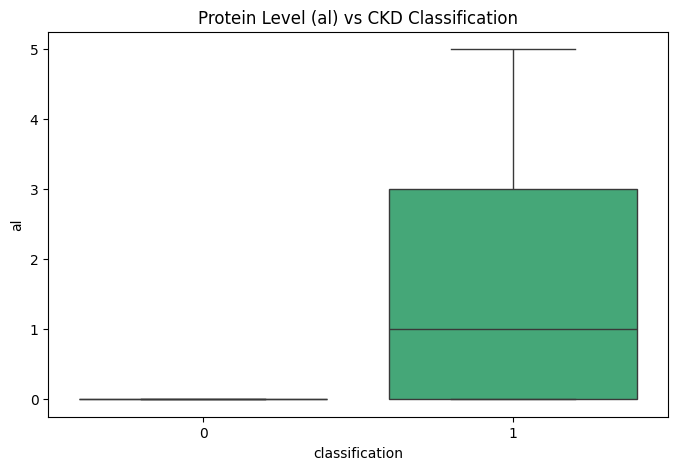

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['classification'], y=df['al'], palette='viridis')
plt.title("Protein Level (al) vs CKD Classification")
plt.show()

4️⃣Hemoglobin Levels Distribution (Histogram)

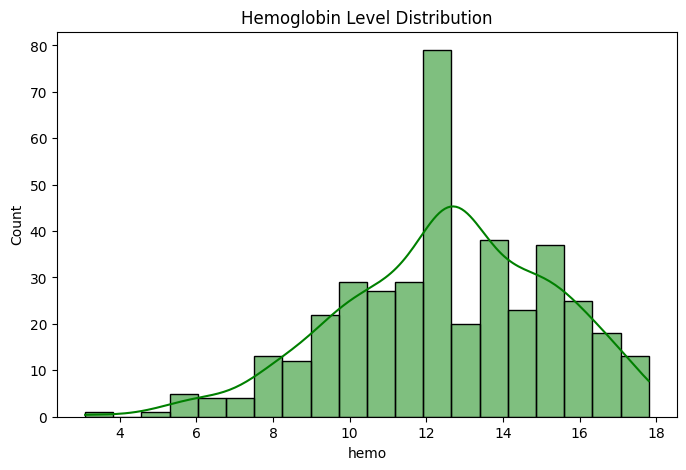

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(df['hemo'], kde=True, bins=20, color='green')
plt.title('Hemoglobin Level Distribution')
plt.show()

Sodium vs. Potassium Levels (Scatter Plot)

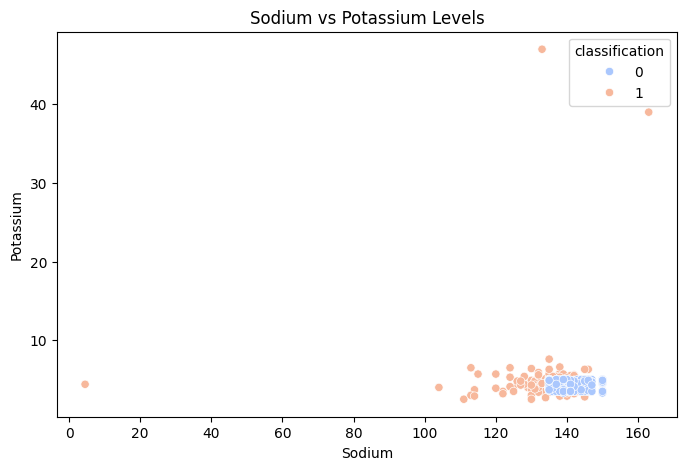

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['sod'], y=df['pot'], hue=df['classification'], palette='coolwarm')
plt.title("Sodium vs Potassium Levels")
plt.xlabel("Sodium")
plt.ylabel("Potassium")
plt.show()

Red Blood Cell Count vs. Packed Cell Volume (Scatter Plot)

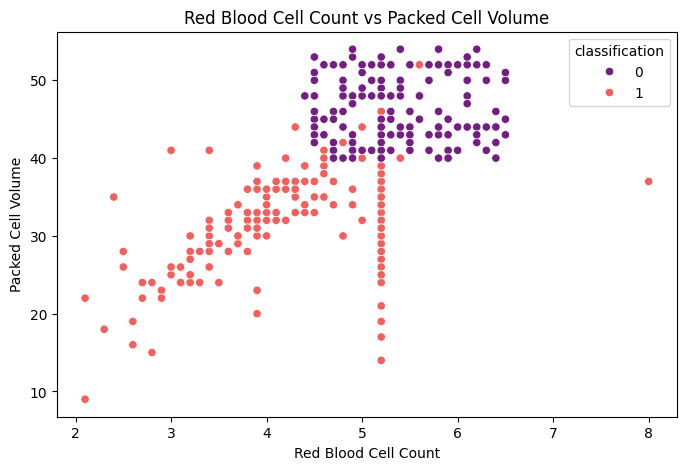

In [31]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['rc'], y=df['pcv'], hue=df['classification'], palette='magma')
plt.title("Red Blood Cell Count vs Packed Cell Volume")
plt.xlabel("Red Blood Cell Count")
plt.ylabel("Packed Cell Volume")
plt.show()


Distribution of Sugar Levels (Histogram)

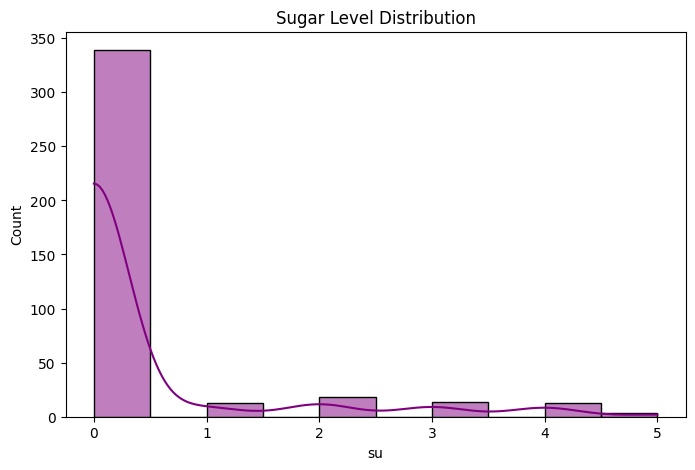

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(df['su'], bins=10, kde=True, color='purple')
plt.title("Sugar Level Distribution")
plt.show()

Chronic Kidney Disease Cases by Appetite (Count Plot)

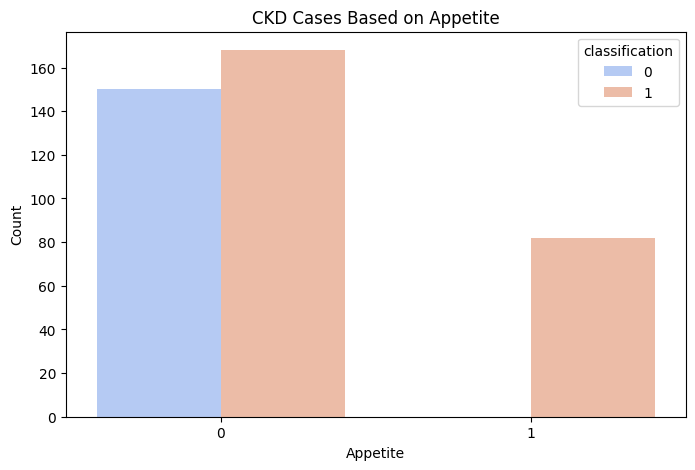

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['appet'], hue=df['classification'], palette='coolwarm')
plt.title("CKD Cases Based on Appetite")
plt.xlabel("Appetite")
plt.ylabel("Count")
plt.show()

In [34]:
x=df.drop(['classification','pcv','hemo','sod'],axis=1)
y=df['classification']

In [35]:
display(x)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,sc,pot,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,1.2,4.4,7800,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,0.8,4.4,6000,5.2,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,1.8,4.4,7500,5.2,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,3.8,2.5,6700,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,1.4,4.4,7300,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,0.5,4.9,6700,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,1.2,3.5,7800,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,0.6,4.4,6600,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,1.0,4.9,7200,5.9,0,0,0,0,0,0


In [36]:
display(y)

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 21), (80, 21), (320,), (80,))

In [45]:
model1=LogisticRegression().fit(x_train,y_train)
y_pred1=model1.predict(x_test)
#print(classification_report(y_test,y_pred1))


c:\Users\Deepi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
# Evaluate the logistic regression model
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred1)
# Classification report
report = classification_report(y_test, y_pred1)

In [47]:
print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)


Logistic Regression Model Evaluation:
Accuracy: 0.9375
Precision: 0.9455
Recall: 0.9630
F1 Score: 0.9541
Confusion Matrix:
[[23  3]
 [ 2 52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        26
           1       0.95      0.96      0.95        54

    accuracy                           0.94        80
   macro avg       0.93      0.92      0.93        80
weighted avg       0.94      0.94      0.94        80



In [54]:
kd_prediction = model1.predict
print(kd_prediction)
print("The Person has chronic kidney disease")

<bound method LinearClassifierMixin.predict of LogisticRegression()>
The Person has chronic kidney disease


In [55]:
filename="kidney_disease_prediction.pkl"
pickle.dump(model1,open(filename,'wb'))